# Дипломная работа по курсу python

## Задание

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -
https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты
Требуется выполнить следующее задание:

|№|Задание|Баллы|
|:-|:-|-|
|1|Загрузите файл HR.csv в pandas dataframe/|5|
|2|Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).|10|
|3|Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.|10|
|4|Рассчитайте сколько сотрудников работает в каждом департаменте.|5|
|5|Показать распределение сотрудников по зарплатам.|5|
|6|Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.|5|
|7|Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.|10|
|8|Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):|10|
| |● Доля сотрудников с повышением за последние 5 лет;| |
| |● Средняя степень удовлетворенности;| |
| |● Среднее количество проектов| |
|9|Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке.|20|
|10|Загрузить jupyter notebook с решением на github и прислать ссылку.|5|

In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns




## 1. Чтение файла данных и преобразование в DataFrame

In [2]:
df = pd.read_csv('HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Информация о DataFrame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Резюме:
 
 Отчет состоит из 14999 строк и 10 столбцов.
 
 В отчете использованиы следующие типы данных: float64(2), int64(6), object(2).
 
 Пропусков значений нет.


## 2. Основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [4]:
# расчет основных статистик
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [5]:
# расчет значения моды
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Расчет и визуализация корреляционной матрицы для количественных переменных. Определение двух самых скоррелированных и двух наименее скоррелированных переменных

In [6]:
# расчет матрицы корреляции
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


Text(0.5, 1.0, 'Матрица корреляции')

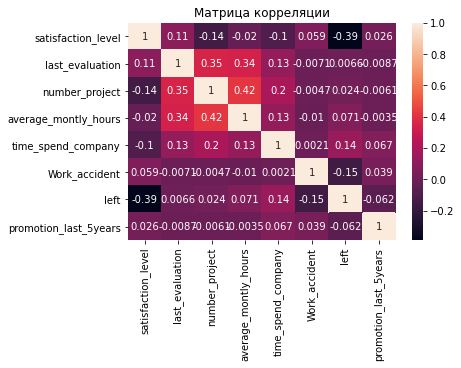

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.title('Матрица корреляции')

In [8]:
# заменим диагональ матрицы на NaN
corr = df.corr()
np.fill_diagonal(corr.values, np.nan)
corr


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,NaN,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,NaN,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,NaN,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,NaN,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,NaN,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,NaN,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,NaN,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,NaN


In [9]:
# pd.set_option('display.max_rows', 100) # количество выводимыхстрок

In [10]:
# Определение двух самыхскоррелированных и двух наименее скоррелированных переменных
# Преобразование DataFrame 'corr' в Series с сортировкой значений для наглядного определения min и max коэф. корреляции
m = corr.abs().unstack().drop_duplicates().sort_values()
m

time_spend_company    Work_accident            0.002120
average_montly_hours  promotion_last_5years    0.003544
number_project        Work_accident            0.004741
                      promotion_last_5years    0.006064
last_evaluation       left                     0.006567
                      Work_accident            0.007104
                      promotion_last_5years    0.008684
average_montly_hours  Work_accident            0.010143
satisfaction_level    average_montly_hours     0.020048
number_project        left                     0.023787
satisfaction_level    promotion_last_5years    0.025605
Work_accident         promotion_last_5years    0.039245
satisfaction_level    Work_accident            0.058697
left                  promotion_last_5years    0.061788
time_spend_company    promotion_last_5years    0.067433
average_montly_hours  left                     0.071287
satisfaction_level    time_spend_company       0.100866
                      last_evaluation          0

In [11]:
print(f'Два самых скоррелированных показателя: {m.idxmax()} - {m.max()}')

print(f'Два наименее скоррелированных показателя: {m.idxmin()} - {m.min()}')

Два самых скоррелированных показателя: ('number_project', 'average_montly_hours') - 0.4172106344017606
Два наименее скоррелированных показателя: ('time_spend_company', 'Work_accident') - 0.00212041809671425


### Резюме:

### две самые скоррелированные переменные: 

| показ.1|показ.2 |коэф.корр. |
|:-|:-|-|
|average_montly_hours|   number_project|           0.417211|

### две наименее скоррелированные переменные:

| показ.1|показ.2 |коэф.корр. |
|:-|:-|-|
|Work_accident|          time_spend_company|       0.002120|


## 4. Расчет количества сотрудников в каждом департаменте

In [12]:
# общее количество сотрудников по департаментам
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [13]:
# количество уволившихся сотрудников
df[df['left']==1]['department'].value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: department, dtype: int64

In [14]:
# количество работающих сотрудников
df[df['left']==0]['department'].value_counts()

sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: department, dtype: int64

### Резюме:

Наибольшее количество сотрудников работают в отделах sales, technical, support. В этих же отделах наблюдается наибольшее количество увольнений.

## 5. Распределение сотрудников по зарплатам

In [15]:
# Распределение сотрудников по зарплатам
dist_salary = df.salary.value_counts()
dist_salary

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Text(0.5, 1.0, 'Salary distribution')

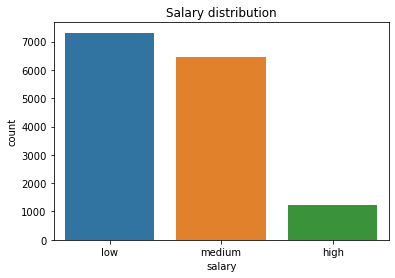

In [16]:
ax = sns.countplot(x="salary", data=df)
ax.set_title('Salary distribution')

In [17]:
# Распределение работающих сотрудников по зарплатам
dist_salary_noleft = df[df['left']==0]['salary'].value_counts()
dist_salary_noleft

low       5144
medium    5129
high      1155
Name: salary, dtype: int64

Text(0.5, 1.0, 'Salary distribution (no left)')

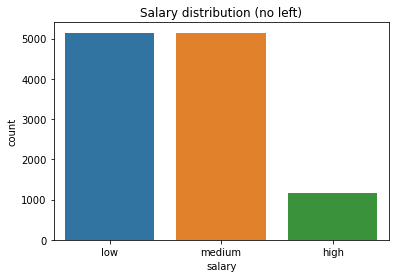

In [18]:
ax0 = sns.countplot(x='salary', data=df[df['left']==0])
ax0.set_title('Salary distribution (no left)')

In [19]:
# Распределение уволившихся сотрудников по зарплатам
dist_salary_left = df[df['left']==1]['salary'].value_counts()
dist_salary_left

low       2172
medium    1317
high        82
Name: salary, dtype: int64

Text(0.5, 1.0, 'Salary distribution (left)')

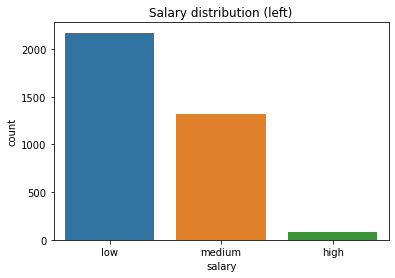

In [20]:
ax1 = sns.countplot(x='salary', data=df[df['left']==1])
ax1.set_title('Salary distribution (left)')

### Резюме:

Наибольшее количество сотрудников имеют низкую и среднюю зарплату. Среди действующих сотрудников соотношение низких и средних зарплат почти одинаково (low-5144, medium-5129). Среди уволившихся наибольшее число сотрудников с низкой зарплатой.

## 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

In [21]:
# распределение всех сотрудников по зарплатам в каждом департаменте
dist_salary_by_dep = df.groupby('department')['salary'].value_counts()
dist_salary_by_dep

department   salary
IT           low        609
             medium     535
             high        83
RandD        medium     372
             low        364
             high        51
accounting   low        358
             medium     335
             high        74
hr           medium     359
             low        335
             high        45
management   high       225
             medium     225
             low        180
marketing    low        402
             medium     376
             high        80
product_mng  low        451
             medium     383
             high        68
sales        low       2099
             medium    1772
             high       269
support      low       1146
             medium     942
             high       141
technical    low       1372
             medium    1147
             high       201
Name: salary, dtype: int64

Text(0.5, 1.0, 'Salary distribution by departments')

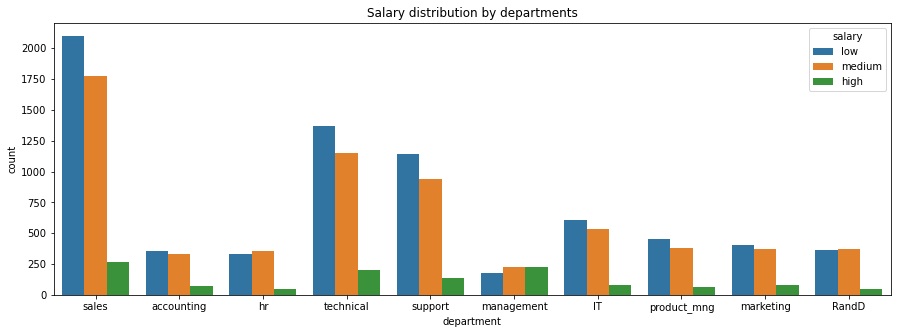

In [22]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x='department', hue='salary', data=df)
ax.set_title('Salary distribution by departments')

In [23]:
# распределение уволившихся сотрудников по зарплатам в каждом департаменте
dist_salary_by_dep_left = df[df['left']==1].groupby('department')['salary'].value_counts()
dist_salary_by_dep_left

department   salary
IT           low       172
             medium     97
             high        4
RandD        medium     62
             low        55
             high        4
accounting   medium    100
             low        99
             high        5
hr           medium    117
             low        92
             high        6
management   low        59
             medium     31
             high        1
marketing    low       126
             medium     68
             high        9
product_mng  low       105
             medium     87
             high        6
sales        low       697
             medium    303
             high       14
support      low       389
             medium    158
             high        8
technical    low       378
             medium    294
             high       25
Name: salary, dtype: int64

Text(0.5, 1.0, 'Salary distribution by departments (left)')

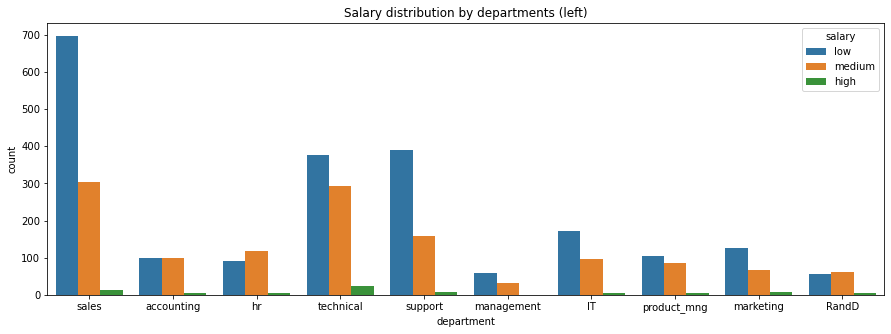

In [24]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x='department', hue='salary', data=df[df['left']==1])
ax.set_title('Salary distribution by departments (left)')

In [25]:
# распределение работающих сотрудников по зарплатам в каждом департаменте
dist_salary_by_dep_noleft = df[df['left']==0].groupby('department')['salary'].value_counts()
dist_salary_by_dep_noleft

department   salary
IT           medium     438
             low        437
             high        79
RandD        medium     310
             low        309
             high        47
accounting   low        259
             medium     235
             high        69
hr           low        243
             medium     242
             high        39
management   high       224
             medium     194
             low        121
marketing    medium     308
             low        276
             high        71
product_mng  low        346
             medium     296
             high        62
sales        medium    1469
             low       1402
             high       255
support      medium     784
             low        757
             high       133
technical    low        994
             medium     853
             high       176
Name: salary, dtype: int64

Text(0.5, 1.0, 'Salary distribution by departments (no left)')

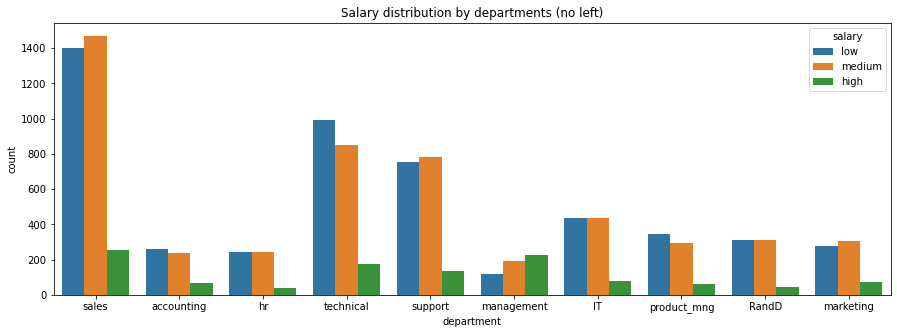

In [26]:
plt.figure(figsize=(15, 5))
ax = sns.countplot(x='department', hue='salary', data=df[df['left']==0])
ax.set_title('Salary distribution by departments (no left)')

### Резюме:

В разрезе отделов ситуация вцелом по компании сохраняется такой же за иключением отделов hr, RandD. В этих отделах уволилось наибольшее число сотрудников со средней зарплатой.

## 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [27]:
# статистика для average_montly_hours при уровне ЗП high
df[df['salary'] == 'high']['average_montly_hours'].describe()

count    1237.000000
mean      199.867421
std        47.710446
min        96.000000
25%       161.000000
50%       199.000000
75%       241.000000
max       307.000000
Name: average_montly_hours, dtype: float64

In [28]:
# статистика для average_montly_hours при уровне ЗП low
df[df['salary'] == 'low']['average_montly_hours'].describe()

count    7316.000000
mean      200.996583
std        50.832214
min        96.000000
25%       155.000000
50%       199.000000
75%       246.000000
max       310.000000
Name: average_montly_hours, dtype: float64

In [29]:
# статистика для average_montly_hours при уровне ЗП medium
df[df['salary'] == 'medium']['average_montly_hours'].describe()

count    6446.000000
mean      201.338349
std        49.344188
min        96.000000
25%       156.000000
50%       201.000000
75%       245.000000
max       310.000000
Name: average_montly_hours, dtype: float64

In [30]:
# среднемесячное отработанное время по уровням зарплаты
average_montly_hours_by_salary = df.groupby('salary')['average_montly_hours'].mean().reset_index()
average_montly_hours_by_salary

,salary,average_montly_hours
0,high,199.867421
1,low,200.996583
2,medium,201.338349


Text(0.5, 1.0, 'average_montly_hours_by_salary')

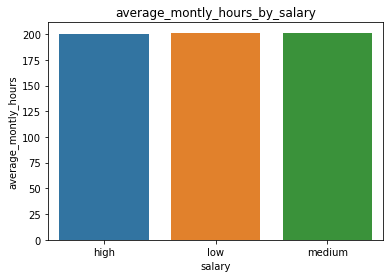

In [31]:
# график среднемесячного отработанного времени по уровням зарплаты 
ax = sns.barplot(x='salary', y='average_montly_hours', data=average_montly_hours_by_salary)
ax.set_title('average_montly_hours_by_salary')

#### Посмотрим на взаимосвязь этих показателей в разрезе отделов

In [32]:
# сводная таблица среднемесячного отработанного времени по отделам по уровням зарплат
salary_pivot = df.pivot_table(index='department', columns='salary', values='average_montly_hours')
salary_pivot.sort_values(by='high')

salary,high,low,medium
department,,,
marketing,185.575000,204.487562,196.869681
product_mng,194.632353,201.048780,199.637076
IT,194.927711,201.382594,204.295327
RandD,199.745098,198.747253,202.954301
technical,200.044776,203.064869,202.248474
management,200.248889,200.744444,202.653333
sales,201.178439,200.363030,201.520316
support,203.985816,198.900524,202.535032
accounting,205.905405,199.899441,201.465672


In [33]:
# статистика для сводной таблицы
salary_pivot.sort_values(by='high').describe()

salary,high,low,medium
count,10.000000,10.000000,10.000000
mean,199.531015,201.109521,200.804272
std,6.624060,1.817891,3.184652
min,185.575000,198.747253,193.863510
25%,196.132058,200.015339,200.094225
50%,200.146833,200.896612,201.884395
75%,203.283971,202.188186,202.623758
max,209.066667,204.487562,204.295327


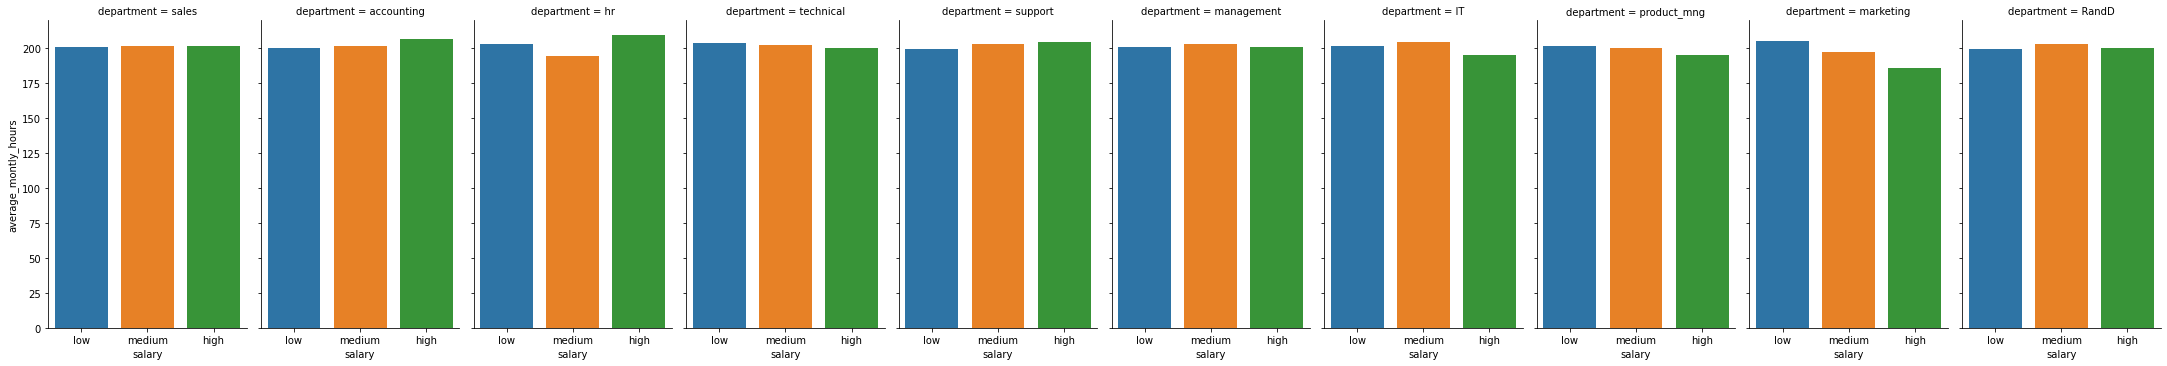

In [34]:
# график среднемесячного отработанного времени по отделам по уровням зарплат
sns.catplot(x='salary', y='average_montly_hours', col='department',
                data=df, 
                kind="bar",
                saturation=.8,
                ci=None, 
                aspect=.6)


<AxesSubplot:xlabel='department'>

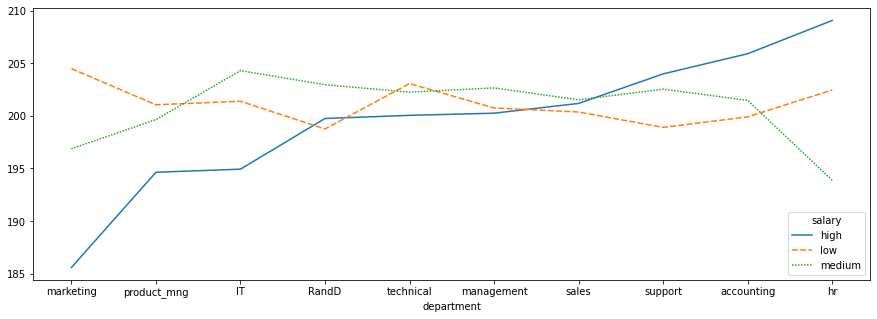

In [35]:
# график среднемесячного отработанного времени по отделам по уровням зарплат
plt.figure(figsize=(15, 5))
sns.lineplot(data=salary_pivot.sort_values(by='high'))

### Проверка гипотезы

#### Сформулируем нулевую H0 и альтернативную H1 гипотезы:

H0 - сотрудники с высоким окладом проводят на работе столькоже времени, сколько сотрудники с низким окладом.

H1 - сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

Уровень значимости примем 5% (alpha = 0.05).

Необходимо выбрать двухвыборочный критерий, т.к. сравниваем две выборки. Выберем критерий Уэлча.

Предположим, что распределение нормальное, дисперсии неравны.

In [36]:
df[df['salary']=='high']['average_montly_hours'].var()

2276.2866157553135

In [37]:
df[df['salary']=='low']['average_montly_hours'].var()

2583.9140006248463

In [38]:
# импорт библиотек
from scipy import stats as st

In [39]:
# проверка гипотезы
alpha = 0.05
result = st.ttest_ind(df[df['salary']=='high']['average_montly_hours'],
                     df[df['salary']=='low']['average_montly_hours'],
                     equal_var=False)
print(result)
print()

if result.pvalue < alpha:
    print('Отвергаем H0, сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом')
else:
    print('Не отвергаем H0, сотрудники с высоким окладом проводят на работе столькоже времени, сколько сотрудники с низким окладом')

Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)

Не отвергаем H0, сотрудники с высоким окладом проводят на работе столькоже времени, сколько сотрудники с низким окладом


### Резюме:
Как видно из теста , statistic=-0.7624331665385475, среднее по сотрудникам с salary high < среднего по сотрудникам с salary low.

pvalue=0.4459045542257889 > alpha=0.05 разность средних значений по выборкам статистически незначима.

Поэтому нулевую гипотезу не отвергаем:

"сотрудники с высоким окладом проводят на работе столькоже времени, сколько сотрудники с низким окладом".



## 8. Расчет следующих показателей среди уволившихся и неуволившихся сотрудников (по отдельности):

● Доля сотрудников с повышением за последние 5 лет;	
● Средняя степень удовлетворенности;	
● Среднее количество проектов

In [40]:
# Доля сотрудников с повышением за последние 5 лет
df.promotion_last_5years.mean()

0.021268084538969265

In [41]:
# Средняя степень удовлетворенности
df.satisfaction_level.mean()

0.6128335222348166

In [42]:
# Среднее количество проектов
df.number_project.mean()

3.80305353690246

### Резюме:

● Доля сотрудников с повышением за последние 5 лет - 0.021268

● Средняя степень удовлетворенности - 0.612833

● Среднее количество проектов - 3.80305

## 9. Разделение данных на тестовую и обучающую выборки. Построение модель LDA, предсказывающей, уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценка качества модели на тестовой выборке.

In [43]:
# данные для модели
data_class = df['left']
data = df.drop(['left', 'department', 'salary'], axis=1)


In [44]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.30)

In [45]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [46]:
lda = LinearDiscriminantAnalysis()

In [47]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [48]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test.values, lda.predict(X_test)]).T
result

,0,1
0,0,0
1,1,0
2,0,0
3,0,1
4,0,0
...,...,...
4495,0,0
4496,0,0
4497,0,0
4498,1,0


In [50]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
# является хорошей метрикой для сбалансированных классов 
#(наблюдений в категориях примерно одинаковое количество)

from sklearn.metrics import accuracy_score

In [51]:
# точность модели
accuracy_score(y_test, lda.predict(X_test))

0.7671111111111111

In [52]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.51357004,  0.57236953, -0.25397182,  0.00466814,  0.23102387,
        -1.04728207, -1.11911416]])

In [53]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Резюме:

Построена модель LDA, предсказывающая, уволится ли сотрудник на основе имеющихся факторов (кроме department и salary). Точность модели составляет 0.768666 (неочень высокая точность).
Рассчитаны коэффициенты дискриминантных линий. Судя по значениям коэффициентов, наибольшее влияние оказывает показатель satisfaction_level, значение коэффициента (-4.44258938).